In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.dates import date2num, DayLocator, DateFormatter
import matplotlib.axes as ax
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [11]:
ebay_tracker = pd.read_csv('C:\\Users\\kenne\\Desktop\\eBay Tracker.csv', encoding='utf-8')

ebay_tracker.set_index('Item Number', inplace=True, drop=True)

print(ebay_tracker.head())

                                               Item Description  \
Item Number                                                       
111249181460  American Eagle Men's Relaxed Fit Jeans Size 36/32   
111249184508  Chaps Men's Blue & Yellow Plaid Flat Front Sho...   
111249190021  Sonoma Men's Life Style Khaki Cargo Pants Size...   
111322329365  Haggar Men's Performance Cool 18 Wear Black Pl...   
111322330524  Sonoma Men's Life Style Olive Green Cargo Pant...   

                              Item Category List Date List Type  \
Item Number                                                       
111249181460  Clothing, Shoes & Accessories  4/2/2014         A   
111249184508  Clothing, Shoes & Accessories  4/2/2014         A   
111249190021  Clothing, Shoes & Accessories  4/2/2014         A   
111322329365  Clothing, Shoes & Accessories  4/8/2014         A   
111322330524  Clothing, Shoes & Accessories  4/8/2014         A   

                    Source Type  Total Cost  Sale Year Sale 

The year is 2013, the height of the holiday season is upon you and you find yourself in the cab of a Penske truck accompanied by your spouse and three dogs on a journey of over 2,000 miles. Yes, I would agree I might very well be a glutton for punishment. But that's a story for another time. Instead, I'm here to share with you what was revealed to me during those three days of travel.

I read an article that discussed the growing trend amongst millenials in particular that value secondary income, or what is often referred to as the 'side-hustle', to be a core component of their overall income. As you can imagine, I've tried to forget everything I can about the time spent in that cab so unfortunately I can't share that original article with you. But the first three links from a quick Google search of 'side hustle statistics' includes "More than 44 million Americans have a side hustle", "15% of Americans Working Side Hustle to Start Their Own Business" and "More Than 1 in 4 Millennials Work a Side Hustle".

There's a lot of inspiration to be drawn from those articles alone and as you can imagine there is quite a bit to consider in deciding whether or not this is something you want to pursue, let alone how to get started. I myself, took the old adage from business, 'buy something for a dollar and sell it for two', and turned that into my own buy and resell side-hustle. What I have to share with you today are the unadulterated, actual results I tracked over the course of two years selling items exclusively on eBay so you can take away from my own experience anything that may benefit you in your own endeavors!

In [4]:
ebay_tracker.sort_values(['Sale Date'], ascending=[True], inplace=True)

first_month = np.min(ebay_tracker['Sale Month'])
print(first_month)

last_month = np.max(ebay_tracker['Sale Month'])
print(last_month)

2014-04
2016-05


Let's start by taking a look at what's inside the data. My experience spans just over two years when I sold my first item in April 2014 and my last item in May 2016.

In [5]:
ebay_tracker.describe(include='all')

,Item Description,Item Category,List Date,List Type,Source Type,Total Cost,Sale Year,Sale Month,Sale Date,Sale Price,...,S&H Paid,S&H Profit/(Loss),Insertion Fee,Final Value Fee,S&H Final Value Fee,PayPal Fee,Total Fees,Total Revenue,Total Expense,Net Profit/(Loss)
count,1078,1078,1078,1078,1078,1078.000000,1078.000000,1078,1078,1078.000000,...,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000,1078.000000
unique,1028,10,224,3,5,NaN,NaN,25,251,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NEW Hagen AquaClear Activated Carbon Filter In...,Home & Garden,7/19/2015,A,Auction (On-line),NaN,NaN,2015-08,7/26/2015,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,284,49,955,484,NaN,NaN,94,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,12.973367,2014.656772,NaN,NaN,31.761911,...,9.302570,-1.188071,0.059045,3.113237,0.837514,1.450176,5.459972,39.876373,27.735909,12.140501
std,NaN,NaN,NaN,NaN,NaN,23.877496,0.577355,NaN,NaN,48.553952,...,9.885662,9.446594,0.119284,4.811025,0.973333,1.464164,6.401860,50.078490,36.292134,19.358050
min,NaN,NaN,NaN,NaN,NaN,0.000000,2014.000000,NaN,NaN,0.010000,...,0.000000,-104.620000,0.000000,0.000000,0.000000,0.000000,0.050000,0.970000,0.930000,-21.060000
25%,NaN,NaN,NaN,NaN,NaN,0.075000,2014.000000,NaN,NaN,4.970000,...,3.880000,0.000000,0.000000,0.500000,0.340000,0.570000,1.612500,9.520000,6.842500,2.102500
50%,NaN,NaN,NaN,NaN,NaN,2.300000,2015.000000,NaN,NaN,11.595000,...,5.900000,0.880000,0.000000,1.075000,0.580000,0.870000,2.940000,19.840000,12.650000,5.360000
75%,NaN,NaN,NaN,NaN,NaN,16.445000,2015.000000,NaN,NaN,39.970000,...,10.530000,1.940000,0.000000,3.900000,0.997500,1.735000,6.692500,49.970000,35.847500,13.637500


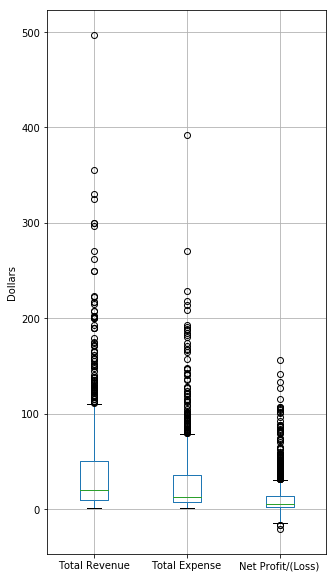

In [6]:
plt.figure(figsize=(5, 10))

ebay_tracker.boxplot(column=['Total Revenue', 'Total Expense', 'Net Profit/(Loss)'])
plt.ylabel('Dollars')

plt.show()

Across each of these three boxplots, the majority of the balances are lower in terms of revenues, expenses and net profits. Thus, the median line, or the mid-point of the data, is placed lower in the box.

The fliers above or below the top and bottom whiskers in each boxplot represent potential outliers, or extreme values, in our population. But given we know this data represents profits and loses tracked over time, these are valid results representing items sold that generated the highest revenues, incurred the greatest expenses and as a result drove higher than normal profits or in some cases, even losses.

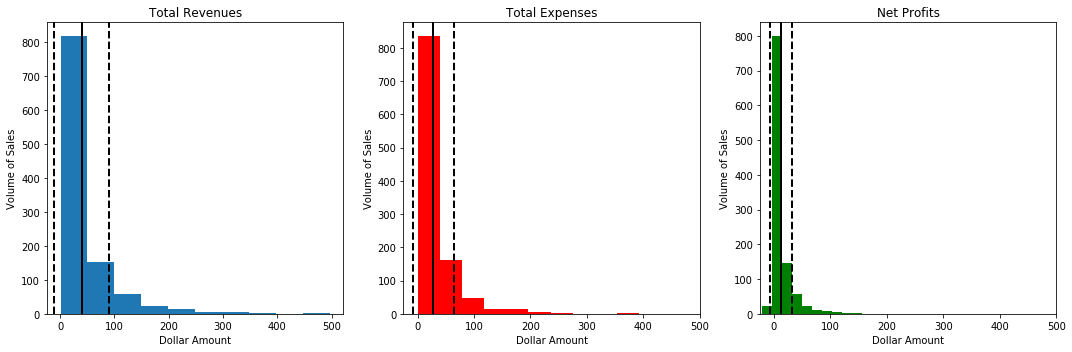

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(ebay_tracker['Total Revenue'])
x = ebay_tracker['Total Revenue']
plt.axvline(x.mean(), color='black', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='black', linestyle='dashed', linewidth=2)
plt.ylabel('Volume of Sales')
plt.xlabel('Dollar Amount')
plt.title('Total Revenues')

plt.subplot(1, 3, 2)
plt.hist(ebay_tracker['Total Expense'], color='red')
x = ebay_tracker['Total Expense']
plt.axvline(x.mean(), color='black', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='black', linestyle='dashed', linewidth=2)
plt.xlim(-25, 500)
plt.ylabel('Volume of Sales')
plt.xlabel('Dollar Amount')
plt.title('Total Expenses')

plt.subplot(1, 3, 3)
plt.hist(ebay_tracker['Net Profit/(Loss)'], color='green')
x = ebay_tracker['Net Profit/(Loss)']
plt.axvline(x.mean(), color='black', linestyle='solid', linewidth=2)
plt.axvline(x.mean() + x.std(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(x.mean() - x.std(), color='black', linestyle='dashed', linewidth=2)
plt.xlim(-25, 500)
plt.ylabel('Volume of Sales')
plt.xlabel('Dollar Amount')
plt.title('Net Profits')

plt.tight_layout()
plt.show()

As each visual illustrates, the mean is placed where the data clusters, but the cluster is not centered. The majority of the data falls within one standard deviation of the mean.

Now we get into the fun stuff!

So if I put myself in your shoes today, or as I was sitting in that passenger seat of a Penske cab over five years ago, I might ask the following:

What am I going to sell?
Where am I going to find this stuff?
Am I going to have to spend a lot of money to make a lot of money?
And how much can I really expect to make?

The first two are interchangeable, and quite frankly, in my own experience what I sold was determined by what I could find. So let's start there.

                   Source Type
Auction (On-line)          484
Auction (On-site)          308
Garage/Yard Sale           119
Personal Property           93
Retail Arbitrage            74


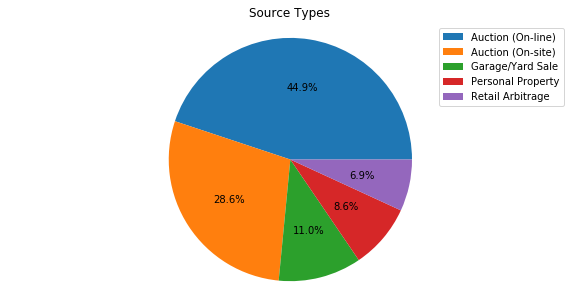

In [8]:
plt.figure(figsize=(10, 5))

source_counts = pd.DataFrame(ebay_tracker['Source Type'].value_counts())
print(source_counts)

plt.pie(source_counts, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Source Types')
plt.legend(source_counts.index)

plt.show()

My number one source for goods to sell was On-line Auctions, which we already knew. Adding to the irony noted earlier, the On-line Auctions category is followed by On-site Auctions. Combined, these two sources accounted for 792 or nearly 74% of all items sold! 

Now this is what worked for me in my market at the time. What works for you in yours may be a different story but I wanted availability and dependability and central Ohio had a robust auction market, especially on-line. So I would certainly recommend looking for similar channels to source your items.

I'm going to add two additional measures to our data set that we'll use to not only wrap up this conversation about sourcing but throughout the rest of the presentation as well, Net Profit Margin and Return on Investment. Let's talk about each of these real quick.

Please note, Net Profit Margin should only be used to measure your own profitability and not to be compared against others. The reason I say this is because Net Profit Margin is an indicator of how well you control costs and how well you price your items, for which the differences in both between two or more individuals can be stark.

Return on Investment (ROI) refers to the benefit you receive from the use of your time and money. It shows how effectively and efficiently your dollars are being used to generate profits.

In [13]:
ebay_tracker['Net Profit Margin'] = (ebay_tracker['Net Profit/(Loss)'] / ebay_tracker['Total Revenue']) * 100

ebay_tracker['ROI'] = ((ebay_tracker['Total Revenue'] - ebay_tracker['Total Expense']) / ebay_tracker['Total Expense']) * 100

In [14]:
ebay_tracker.groupby('Source Type')['Total Revenue', 'Total Expense', 'Net Profit/(Loss)', 'Net Profit Margin', 'ROI'].mean()

,Total Revenue,Total Expense,Net Profit/(Loss),Net Profit Margin,ROI
Source Type,,,,,
Auction (On-line),69.100723,49.307789,19.792975,26.173102,47.829976
Auction (On-site),17.106753,11.420097,5.686656,28.768269,56.621218
Garage/Yard Sale,13.025126,7.941176,5.083950,35.824912,69.391053
Personal Property,17.411613,8.309355,9.102366,42.847951,101.218933
Retail Arbitrage,14.916622,10.799730,4.117027,21.531212,47.657690


Hold on a moment, you might say, the average Net Profit Margin and ROI for On-line Auctions are both lower than every other source but Retail Arbitrage. First, I'll point out that these On-line Auctions are an extension of Retail Arbitrage. Also, there is some bias in these results. For example, I attribute no costs, only selling fees, to Personal Property because I assume the original cost associated with these items, even if I knew what that was, had been recovered over time through my family's enjoyment. Case in point, my son grew out of his baby clothes and there is a healthy market for baby clothes.

What I would draw your attention to is that revenues from On-line Auction items are significantly higher than any other source. Of course, so are expenses. But if you can control your costs and use your dollars more effectively than I did, there is a real upside here!

Now we're going to pivot into what kind of items I was selling.

When I ran those summary statistics above we saw Home & Garden listed as the most frequent category. Let's see what other categories I sold in, how many items I sold under each and everyone's favorite, what kind of profits I realized.

                                    Item Category
Home & Garden                                 284
Toys & Games                                  218
Sporting Goods & Outdoors                     210
Antiques & Collectibles                       134
Clothing, Shoes & Accessories                  93
Literature                                     40
Consumer Electronics & Accessories             33
Pets Supplies                                  28
Tools & Garage                                 25
Vehicle Parts & Accessories                    13


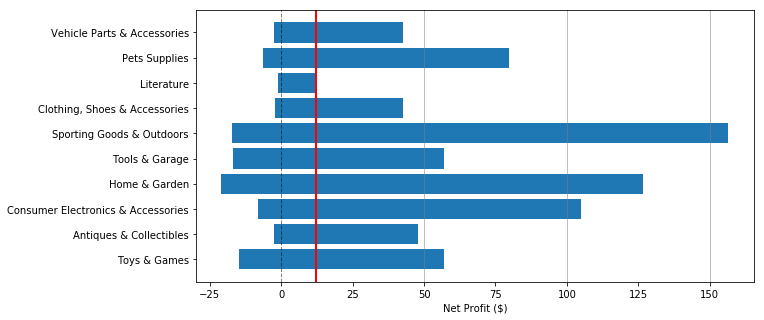

The average profit across all categories, as dictated by the red line, is $12.14.


In [11]:
category_count = pd.DataFrame(ebay_tracker['Item Category'].value_counts())
print(category_count)

plt.figure(figsize=(10, 5))

plt.barh(ebay_tracker['Item Category'], ebay_tracker['Net Profit/(Loss)'], align='center')
x = ebay_tracker['Net Profit/(Loss)']
plt.axvline(0, color='black', linestyle='dashed', linewidth=1, alpha=.5)
plt.axvline(x.mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(x = 50, color='gray', linestyle='solid', linewidth=1, alpha=.5)
plt.axvline(x = 100, color='gray', linestyle='solid', linewidth=1, alpha=.5)
plt.axvline(x = 150, color='gray', linestyle='solid', linewidth=1, alpha=.5)
plt.xlabel('Net Profit ($)')

plt.show()

avg = x.mean()
print("The average profit across all categories, as dictated by the red line, is ${}.".format(round(avg, 2)))

Home & Garden is accompanied by Toys & Games and Sporting Goods & Outdoors to round out the top three, accounting for 712 or two-thirds of all items sold.

Sporting Goods & Outdoors, in terms of pure profits, exceeds any other category. In the eariler stages of my hustle, I was able to source high value items in this category for relatively low cost but eventually, others caught on and that gap tightened as competition grew.

For the first time, you're getting a dose of reality. As you can see in the chart above, you can and will lose money in some transactions. To be fair, every category experienced losses but it's part of the process and there is still value in those lessons learned.

Now I just eluded to high value items within my favorite category, which opens the discussion about another adage in business, you have to spend money to make money. Often leading to a common misconception, that higher value items lead to higher profits and you shouldn't waste your time on lower value items.

Referring back to one of the original views into our data, Total Cost, which is the cost specific to the item before any selling or shipping fees, has a range from as low as zero dollars (Personal Property) to as high as $276. Let's break our population into low and high value items to dispell any misconception about the profitability of lower value items.

Since I primarily shipped my items using USPS Priority Mail, let's draw the line at $50 in terms of low or high value since that is the amount of insurance USPS is willing to provide as part of your shipping rate.

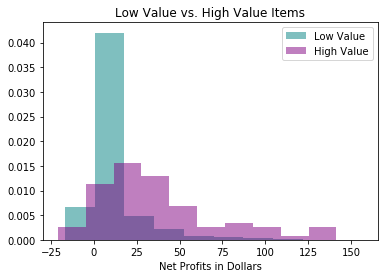

I sold 1007 low value items for a total profit of $10437.45, with a 29.77% average Net Profit Margin and 59.35% average ROI.

I sold 71 high value items for a total profit of $2650.01, with a 19.59% average Net Profit Margin and 28.43% average ROI.


In [15]:
# We set x to 50 to make it easy to adjust the threshold between low and high value items.
x = 50

low_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] <= x, 'Net Profit/(Loss)']
high_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] > x, 'Net Profit/(Loss)']

plt.hist(low_value_items, density=True, color='teal', alpha=.5)
plt.hist(high_value_items, density=True, color='purple', alpha = .5)
plt.title('Low Value vs. High Value Items')
plt.xlabel('Net Profits in Dollars')
labels=["Low Value", "High Value"]
plt.legend(labels)

plt.show()

total_low_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] <= x, 'Net Profit/(Loss)'].count()
sales_low_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] <= x, 'Net Profit/(Loss)'].sum()
avg_npm_low_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] <= x, 'Net Profit Margin'].mean()
avg_roi_low_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] <= x, 'ROI'].mean()

total_high_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] > x, 'Net Profit/(Loss)'].count()
sales_high_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] > x, 'Net Profit/(Loss)'].sum()
avg_npm_high_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] > x, 'Net Profit Margin'].mean()
avg_roi_high_value_items = ebay_tracker.loc[lambda df: ebay_tracker['Total Cost'] > x, 'ROI'].mean()

print("I sold {} low value items for a total profit of ${}, with a {}% average Net Profit Margin and {}% average ROI.".format(
total_low_value_items, round(sales_low_value_items, 2), round(avg_npm_low_value_items, 2), round(avg_roi_low_value_items, 2)))
print('')
print("I sold {} high value items for a total profit of ${}, with a {}% average Net Profit Margin and {}% average ROI.".format(
total_high_value_items, round(sales_high_value_items, 2), round(avg_npm_high_value_items, 2), round(avg_roi_high_value_items, 2)))

'Low value' items accounted for the overwhelming majority of my sales and profits!

We can certainly argue what constitutes low versus high value. Perception is reality and it's hard to measure perception. I once sold a Battletoads action figure for $75, still in the box of course. I paid a dollar for it. So was that a low or high value item?

Here's the underlying impression I want you to take from this summary, this is very much a volume driven game! The more you sell the more opportunity you have to profit and let's face it, you're going to have an easier time sourcing and selling low value, or maybe better stated, lower cost items.

Let's wrap things up and take a look at the results of my 'side-hustle' over time.

In [15]:
ebay_tracker.groupby('Sale Year').aggregate({
    'Item Description' : 'count',
    'Total Revenue': 'sum',
    'Total Expense': 'sum',
    'Net Profit/(Loss)': 'sum',
    'Net Profit Margin': 'mean',
    'ROI': 'mean'
})

,Item Description,Total Revenue,Total Expense,Net Profit/(Loss),Net Profit Margin,ROI
Sale Year,,,,,,
2014,428,6802.83,3922.88,2879.96,34.783803,73.307587
2015,592,32648.17,23507.59,9140.61,25.627127,47.090245
2016,58,3535.73,2468.84,1066.89,22.603704,43.681662


In [17]:
total_sales = np.sum(ebay_tracker['Net Profit/(Loss)'])
total_npm = np.mean(ebay_tracker['Net Profit Margin'])
total_roi = np.mean(ebay_tracker['ROI'])

line = "Overall, my \"side-hustle\" produced ${} in profits and averaged a {}% profit margin and a {}% return on investment!".format(
total_sales, round(total_npm, 1), round(total_roi, 1))
print(line)

Overall, my "side-hustle" produced $13087.46 in profits and averaged a 29.1% profit margin and a 57.3% return on investment!


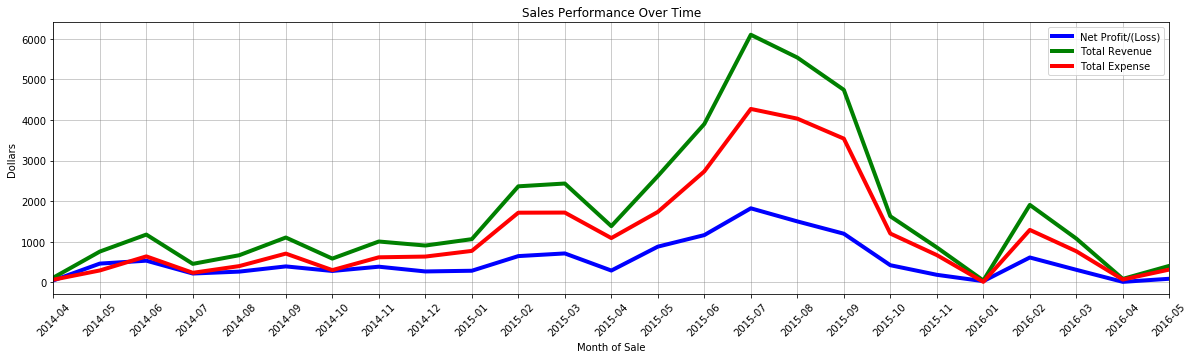

In [6]:
profits_per_month = ebay_tracker.groupby('Sale Month')['Net Profit/(Loss)'].sum()
revenues_per_month = ebay_tracker.groupby('Sale Month')['Total Revenue'].sum()
expenses_per_month = ebay_tracker.groupby('Sale Month')['Total Expense'].sum()

plt.figure(figsize=(20, 5))

plt.plot(profits_per_month, color='blue', linewidth=4)
plt.plot(revenues_per_month, color='green', linewidth=4)
plt.plot(expenses_per_month, color='red', linewidth=4)
plt.xlim('2014-04', '2016-05')
plt.ylabel('Dollars')
plt.xlabel('Month of Sale')
plt.title('Sales Performance Over Time')
plt.xticks(rotation=45)
plt.grid(b=True, which='major', color='gray', linestyle='solid', alpha=.5)
plt.legend()

plt.show()

2015 was my best year and that's in large part because 2014 and 2016 were only partial years. But I certainly hit my stride in 2015 while things on both sides of the fence, buying and selling, really started to make 'cents' (pun intended). By the time 2016 came around I was already starting to wind things down.

But if somehow I have inspired you, or if your inspiration is not in short supply and you're ready to build your own secondary income stream through some sort of 'side-hustle', let me leave you with one last impression. Always be mindful of your own situation, limits and comforts. If you're stressing in any one of those areas you are less likely to experience the level of success you hoped to achieve.

Before I conclude, the information presented today is far from the overall narrative that can be drawn. I think there are two opportunites where you can take this narrative even further. One that finds it's roots in the dataset I shared with you today and the other with regard to the concept of secondary income or 'side-hustle' economics in general.

Before I quit my buy and resell venture, I was considering expanding my business into Amazon. I believed I would enjoy even greater profits selling on Amazon's platform. A comparison between eBay and Amazon during this same time period and over these same categories/items would be very telling. That comparison could even be expanded to present day using other seller's results from each platform so others just like you who are considering doing something similar will be better informed and can make smarter business decisions.

And finally, I've spoken to you today about just one possible opportunity to create secondary income. In my opening comments, I noted an on-line article that stated 44 million Americans have a 'side-hustle'. I'm willing to bet the possibilities are only limited by their imaginations. We could take the top three, five or even ten and run comparisons between them to see which ones are more lucrative? How many of the 44 million have more than one 'side-huslte'? How many consider this 'secondary income' as their primary source of income? Maybe it's their only source of income? There is a great deal to explore in 'side-hustle' economics!